# Sensitivity Analysis
## Objective
This notebook is dedicated to understand how social distancing will effect the spread of an epidemic.
## Setup

In [1]:
using DifferentialEquations, Plots, Plots.PlotMeasures

## Utility functions

In [2]:
# change plot fonts
bplot(p, s) = plot!(p, titlefont=font(s, "Times"), xguidefontsize=s-4
    , ytickfont=font(s-4, "Times"), margin=8mm, yguidefontsize=s-4
    , xtickfont = font(s-4, "Times"), legendfont=font(s-8, "Times"))

# this function will generate a T period of social distancing at time t0
sinput(t, ts) = if t-ts<0 0 elseif t==ts 0.5 else 1 end

sinput (generic function with 1 method)

# $SIR$ Model

## Basics

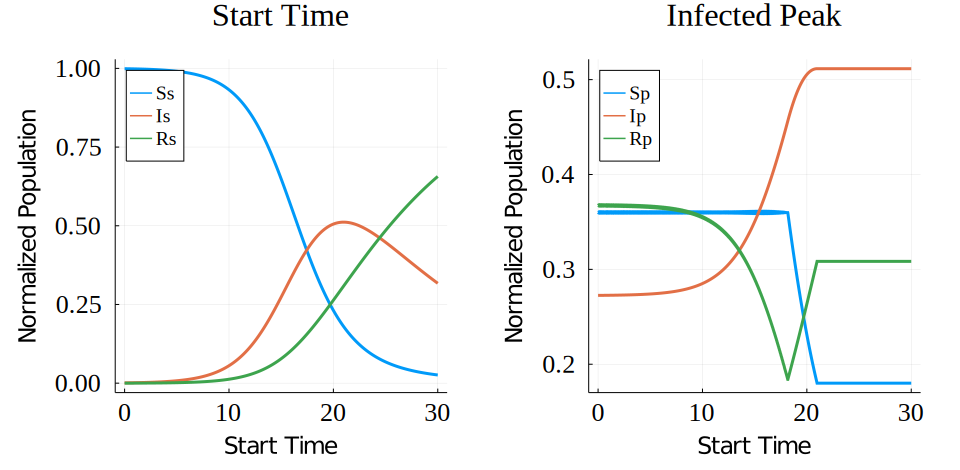

In [3]:
# model description
function SIR(dx,x,p,t)
    b, db, g, ts = p
    u = b - db.*sinput(t, ts)
    dx[1] = -u*x[1]*x[2]
    dx[2] = u*x[1]*x[2] - g*x[2]
    dx[3] = g*x[2]
end

beta  = 0.5
bdiff = 0.25
gamma = 0.09

# define initial values
u0 = [1-1e-3, 1e-3, 0.]
p  = [beta, bdiff, gamma, 0.]

# ode solver and time span
alg   = BS3()
tspan = (0.0, 50)

# resolution of numerical simulation
tsrng = 0:0.01:30
tsval = zeros(3,size(tsrng,1))
infpk = zeros(3,size(tsrng,1))

# show something
for i = 1:size(tsrng,1)
    p[4] = tsrng[i]
    prob = ODEProblem(SIR, u0, tspan, p)
    sol  = solve(prob, alg, reltol=1e-8, abstol=1e-8, saveat=0.01)
    tsval[:,i] = sol(tsrng[i])
    index = findmax(sol[2,:])
    infpk[:,i] = sol[:,Int(index[2])]
    end


# show something
p1 = plot(tsrng, tsval[1,:], linewidth=3, label="Ss")
p1 = plot!(p1,tsrng, tsval[2,:], linewidth=3, label="Is")
p1 = plot!(p1,tsrng, tsval[3,:], linewidth=3, label="Rs", title="Start Time", 
        xlabel="Start Time", ylabel="Normalized Population",legend=:topleft)
p1 = bplot(p1,20)

p2 = plot(tsrng, infpk[1,:], linewidth=3, label="Sp")
p2 = plot!(p2,tsrng, infpk[2,:], linewidth=3, label="Ip")
p2 = plot!(p2,tsrng, infpk[3,:], linewidth=3, label="Rp", title="Infected Peak", 
        xlabel="Start Time", ylabel="Normalized Population",legend=:topleft)
p2 = bplot(p2,20)

fig = plot(p1, p2, layout=(1,2), size=(960,470))
savefig(fig, "figures/sensitivity_peak.pdf")
fig

## Differential Sensitivity

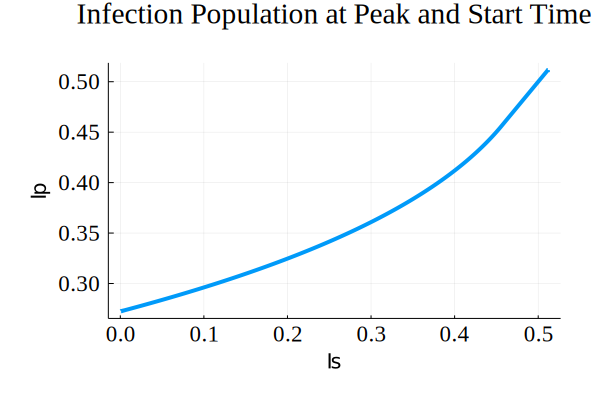

In [4]:
inx = findmax(tsval[2,:])
its = tsval[2,1:Int(inx[2])]
ipk = infpk[2,1:Int(inx[2])]
tsp = tsrng[1:Int(inx[2])]
p = plot(its, ipk, label=false, linewidth=4,
         xlabel="Is", ylabel="Ip", title="Infection Population at Peak and Start Time")
bplot(p, 18)

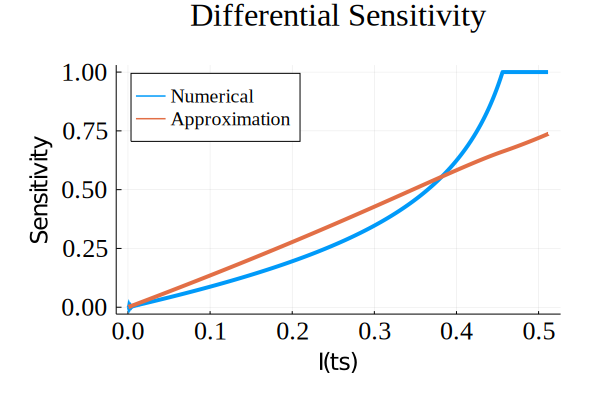

In [5]:
p = plot(its[1:end-1], its[1:end-1]./ipk[1:end-1].*diff(ipk)./diff(its), label="Numerical",
         linewidth=4, xlabel="I(ts)", ylabel="Sensitivity", title="Differential Sensitivity")
p = plot!(p, its, 0.36.*its./ipk./(1 .- its), label="Approximation",legend=:topleft, linewidth=4)
p = bplot(p, 20)
savefig(p, "figures/sensitivity.pdf")
p

# Provenance

In [6]:
using Dates
Dates.format(now(), "Y/U/d HH:MM")  

"2021/March/3 09:19"